In [1]:
import numpy as np
import pandas as pd
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import pymc3 as pm, theano.tensor as tt
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)

# Data Exploration and Visualization

FIFA 2018 Russia dataset is created using statistics from Google and FIFA app
https://play.google.com/store/apps/details?id=com.fifa.fifaapp.android&hl=en

In [2]:
df_all = pd.read_csv('FIFA 2018 Russia.csv')

In [3]:
df_all

,Date,Team,Opponent,Points,Goal Scored,Goal Conceded,Ball Possession %,Attempts,On-Target,Off-Target,...,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red
0,14-06-2018,Russia,Saudi Arabia,3,5,0,40,13,7,3,...,3,11,0,78,306,118,22,0,0,0
1,14-06-2018,Saudi Arabia,Russia,0,0,5,60,6,0,3,...,1,25,2,86,511,105,10,0,0,0
2,15-06-2018,Egypt,Uruguay,0,0,1,43,8,3,3,...,1,7,3,78,395,112,12,2,0,0
3,15-06-2018,Uruguay,Egypt,3,1,0,57,14,4,6,...,1,13,3,86,589,111,6,0,0,0
4,15-06-2018,Morocco,Iran,0,0,1,64,13,3,6,...,0,14,2,86,433,101,22,1,0,0
5,15-06-2018,Iran,Morocco,3,1,0,36,8,2,5,...,0,22,2,86,194,100,14,3,0,0
6,15-06-2018,Portugal,Spain,1,3,3,39,8,3,2,...,1,13,2,87,366,102,12,1,0,0
7,15-06-2018,Spain,Portugal,1,3,3,61,12,5,5,...,3,13,0,93,727,103,10,1,0,0
8,16-06-2018,France,Australia,3,2,1,51,12,5,4,...,0,19,1,87,484,103,16,1,0,0
9,16-06-2018,Australia,France,0,1,2,49,4,1,2,...,0,16,4,85,390,111,19,3,0,0


In [4]:
# results table
df_all['game'], df_all['Goal Difference'] = df_all['Team'] + ' - ' + df_all['Opponent'], df_all['Goal Scored'] - df_all['Goal Conceded']
df_all['games'] = list(zip(df_all['game'], df_all['Goal Scored'], df_all['Goal Conceded'], df_all['Points'], df_all['Goal Difference'], df_all['Ball Possession %']))
df_all['games']

0         (Russia - Saudi Arabia, 5, 0, 3, 5, 40)
1        (Saudi Arabia - Russia, 0, 5, 0, -5, 60)
2              (Egypt - Uruguay, 0, 1, 0, -1, 43)
3               (Uruguay - Egypt, 1, 0, 3, 1, 57)
4               (Morocco - Iran, 0, 1, 0, -1, 64)
5                (Iran - Morocco, 1, 0, 3, 1, 36)
6              (Portugal - Spain, 3, 3, 1, 0, 39)
7              (Spain - Portugal, 3, 3, 1, 0, 61)
8            (France - Australia, 2, 1, 3, 1, 51)
9           (Australia - France, 1, 2, 0, -1, 49)
10          (Argentina - Iceland, 1, 1, 1, 0, 72)
11          (Iceland - Argentina, 1, 1, 1, 0, 28)
12              (Peru - Denmark, 0, 1, 0, -1, 52)
13               (Denmark - Peru, 1, 0, 3, 1, 48)
14             (Crotia - Nigeria, 2, 0, 3, 2, 54)
15            (Nigeria - Crotia, 0, 2, 0, -2, 46)
16         (Costa Rica - Serbia, 0, 1, 0, -1, 50)
17          (Serbia - Costa Rica, 1, 0, 3, 1, 50)
18            (Germany - Mexico, 0, 1, 0, -1, 60)
19             (Mexico - Germany, 1, 0, 3, 1, 40)


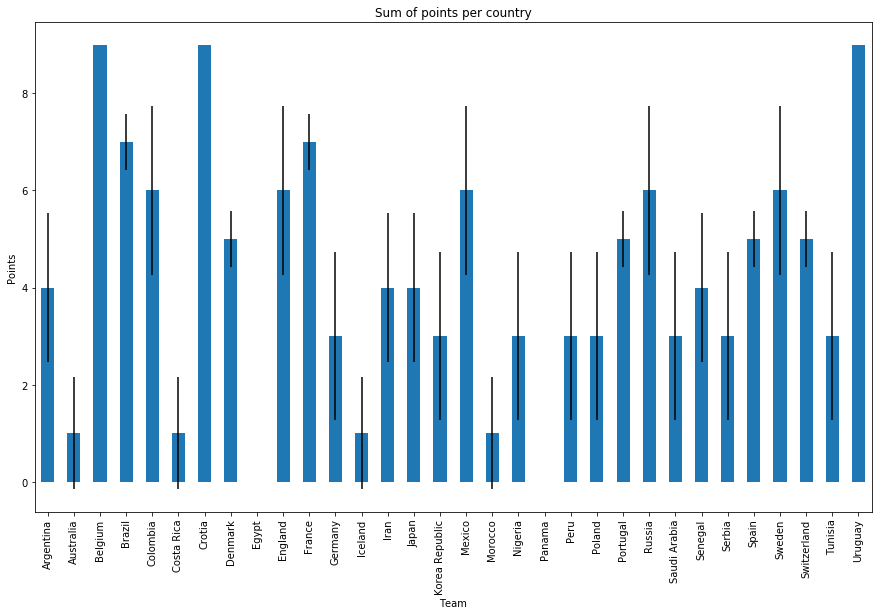

In [5]:
#Total Team Points
(df_all.groupby('Team')['Points']
      .sum()
      .plot(kind='bar', title='Sum of points per country', yerr=df_all.groupby('Opponent')['Points'].std())
      .set_ylabel('Points'));

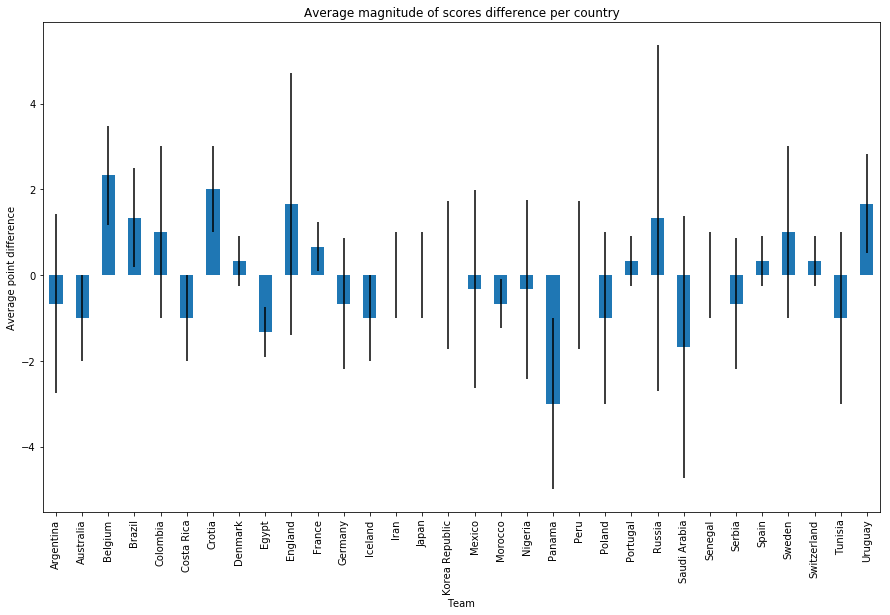

In [6]:
#Goal Difference
(df_all.groupby('Team')['Goal Difference']
      .mean()
      .plot(kind='bar', title='Average magnitude of scores difference per country', yerr=df_all.groupby('Opponent')['Goal Difference'].std())
      .set_ylabel('Average point difference'));

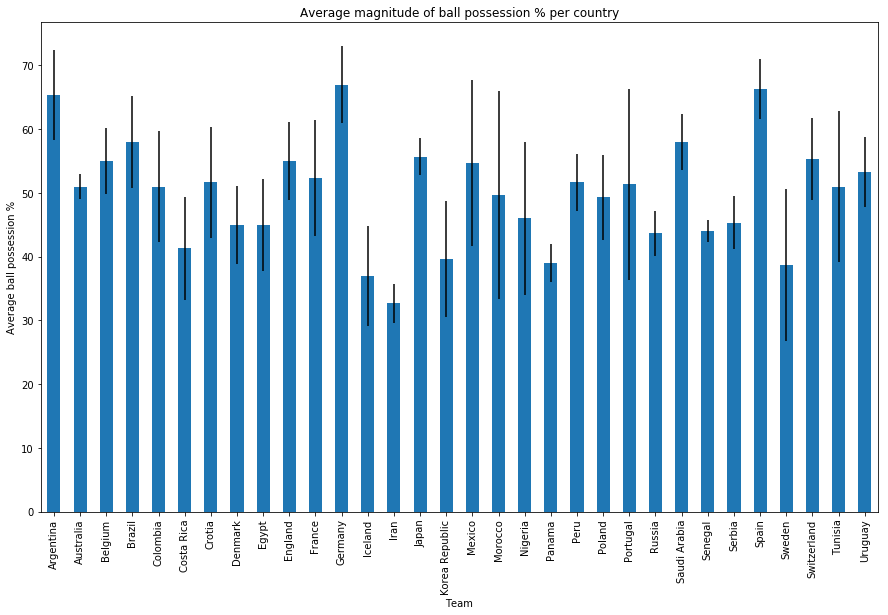

In [7]:
#Average Ball Possession %
(df_all.groupby('Team')['Ball Possession %']
      .mean()
      .plot(kind='bar', title='Average magnitude of ball possession % per country', yerr=df_all.groupby('Team')['Ball Possession %'].std())
      .set_ylabel('Average ball possession %'));

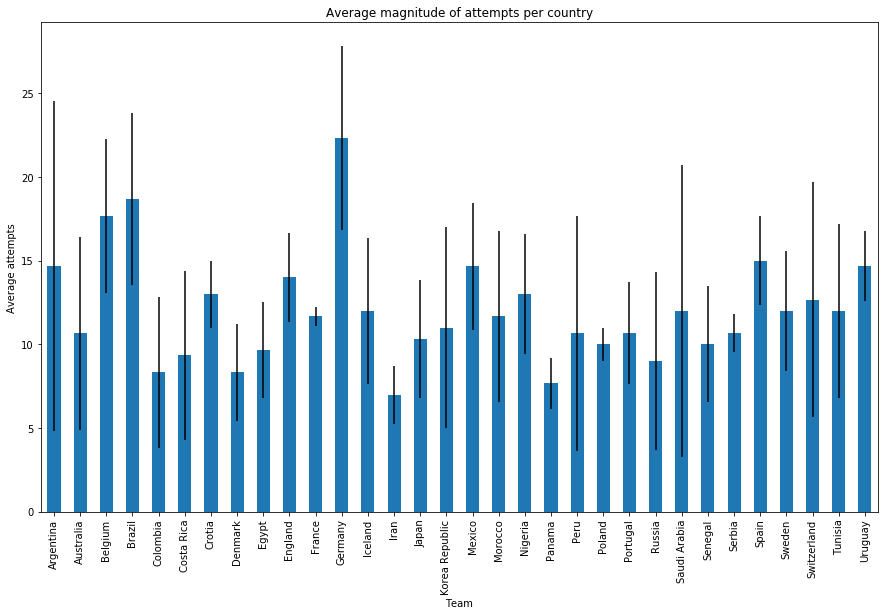

In [8]:
#Average Attempts
(df_all.groupby('Team')['Attempts']
     .mean()
      .plot(kind='bar', title='Average magnitude of attempts per country', yerr=df_all.groupby('Team')['Attempts'].std())
      .set_ylabel('Average attempts'));

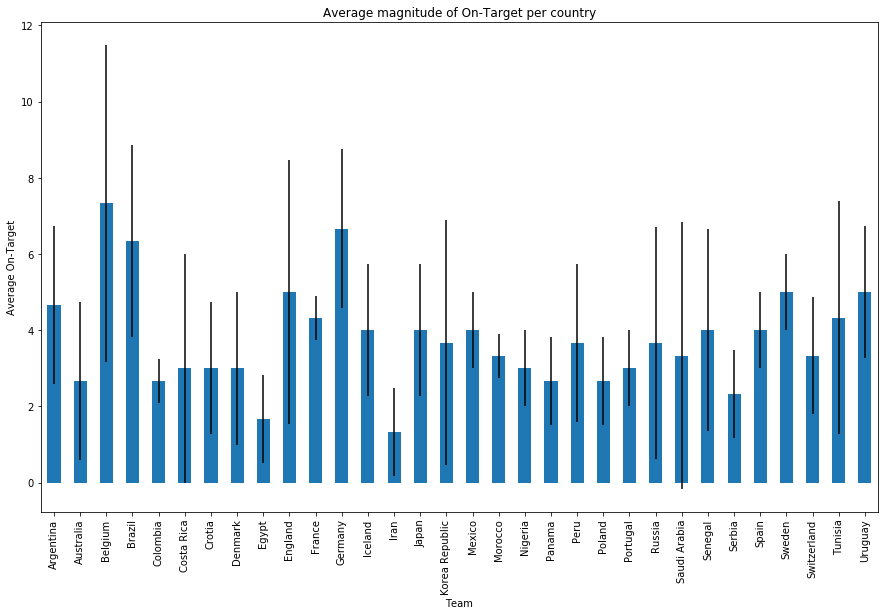

In [9]:
#Average On Target
(df_all.groupby('Team')['On-Target']
      .mean()
      .plot(kind='bar', title='Average magnitude of On-Target per country', yerr=df_all.groupby('Team')['On-Target'].std())
      .set_ylabel('Average On-Target'));

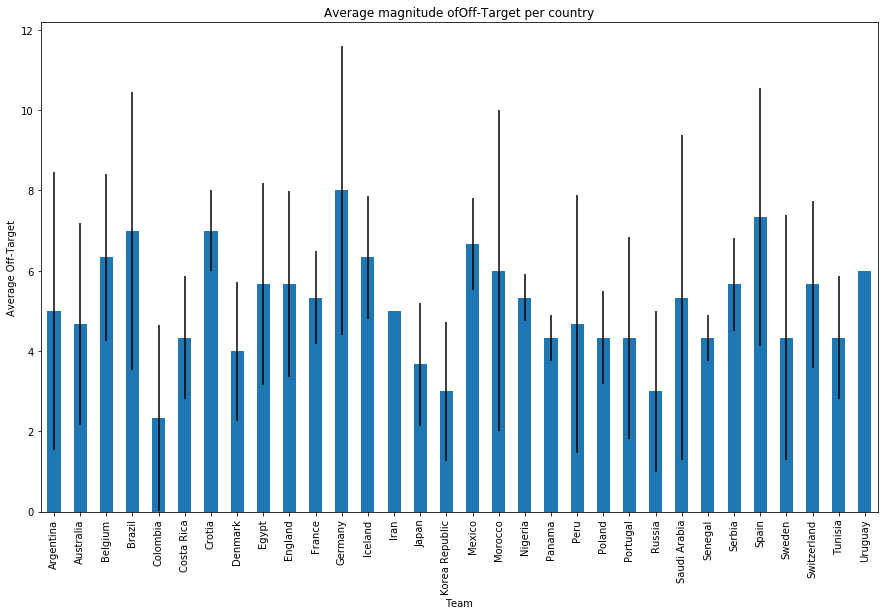

In [10]:
#Average Off Target
(df_all.groupby('Team')['Off-Target']
      .mean()
      .plot(kind='bar', title='Average magnitude ofOff-Target per country', yerr=df_all.groupby('Team')['Off-Target'].std())
      .set_ylabel('Average Off-Target'));

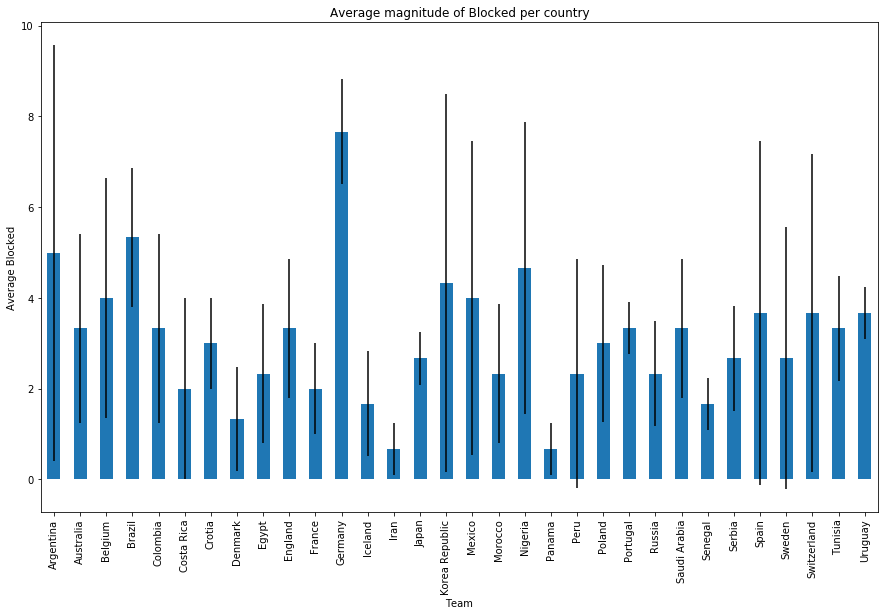

In [11]:
#Blocked
(df_all.groupby('Team')['Blocked']
      .mean()
      .plot(kind='bar', title='Average magnitude of Blocked per country', yerr=df_all.groupby('Team')['Blocked'].std())
      .set_ylabel('Average Blocked'));

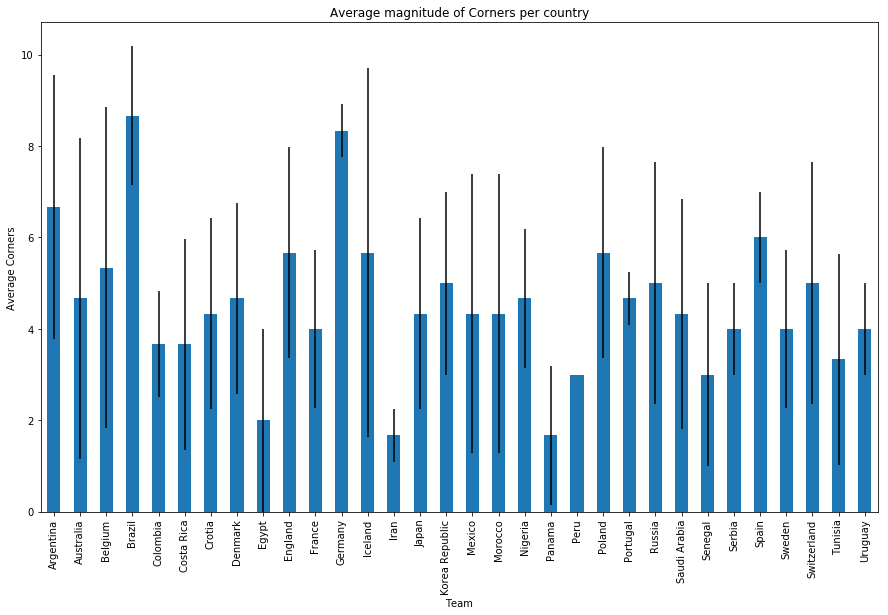

In [12]:
#Corners
(df_all.groupby('Team')['Corners']
      .mean()
      .plot(kind='bar', title='Average magnitude of Corners per country', yerr=df_all.groupby('Team')['Corners'].std())
      .set_ylabel('Average Corners'));

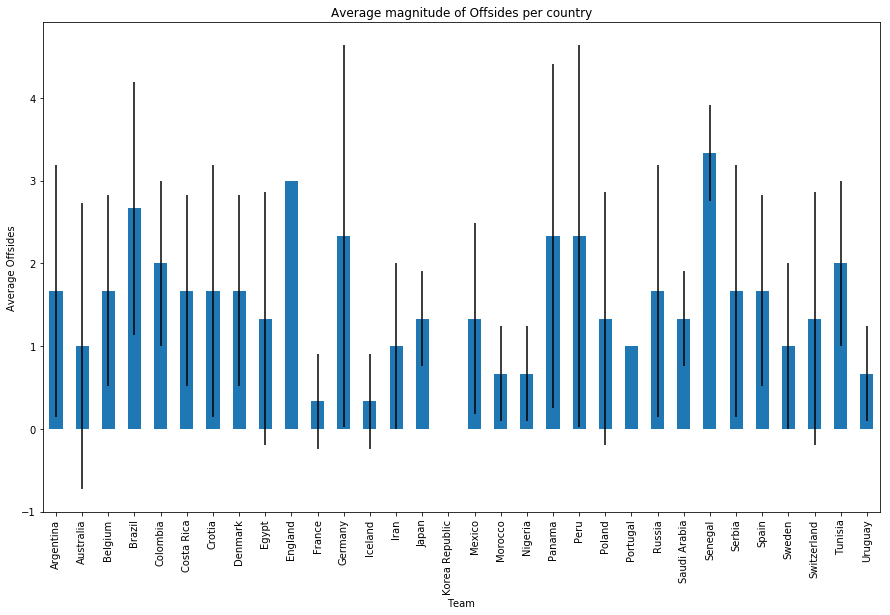

In [13]:
#Offsides
(df_all.groupby('Team')['Offsides']
      .mean()
      .plot(kind='bar', title='Average magnitude of Offsides per country', yerr=df_all.groupby('Team')['Offsides'].std())
      .set_ylabel('Average Offsides'));

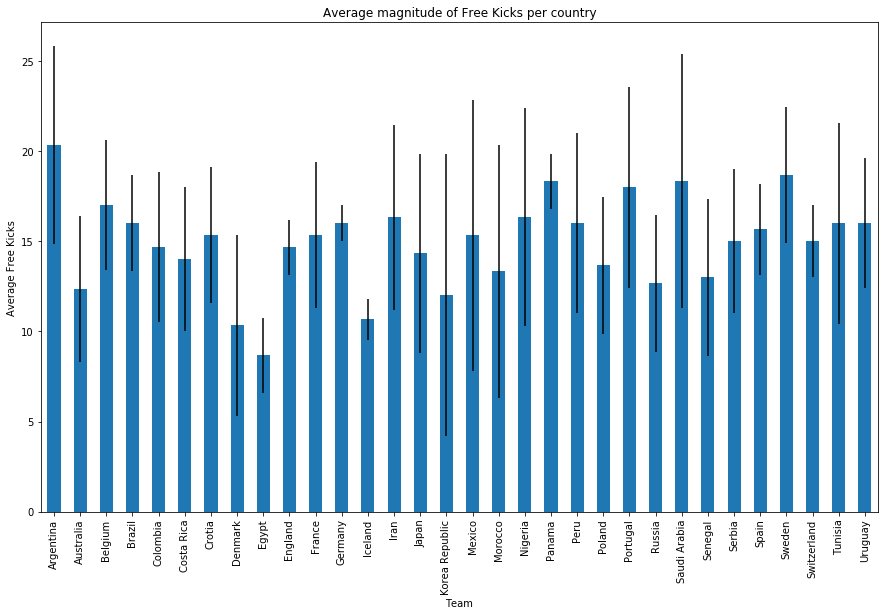

In [14]:
#Free Kicks
(df_all.groupby('Team')['Free Kicks']
      .mean()
      .plot(kind='bar', title='Average magnitude of Free Kicks per country', yerr=df_all.groupby('Team')['Free Kicks'].std())
      .set_ylabel('Average Free Kicks'));

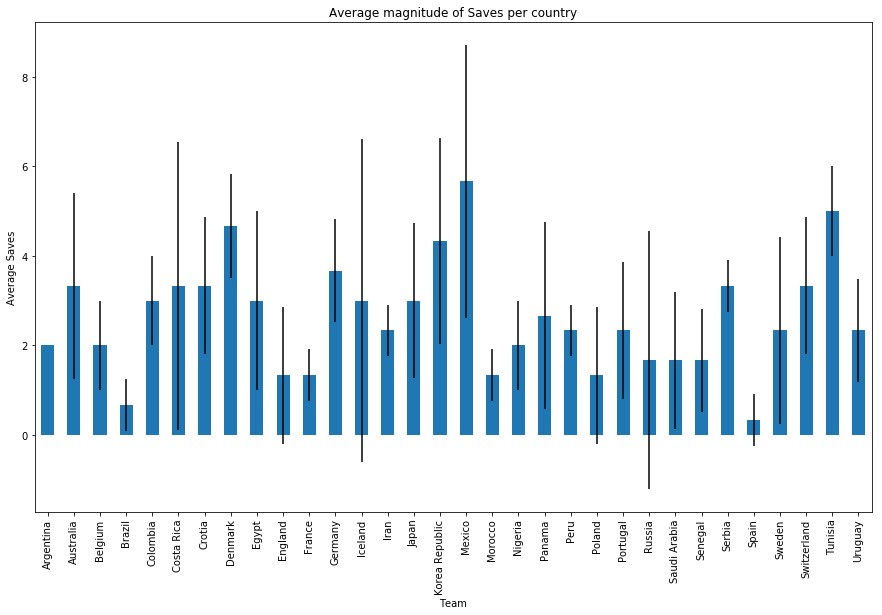

In [15]:
#Saves
(df_all.groupby('Team')['Saves']
      .mean()
      .plot(kind='bar', title='Average magnitude of Saves per country', yerr=df_all.groupby('Team')['Saves'].std())
      .set_ylabel('Average Saves'));

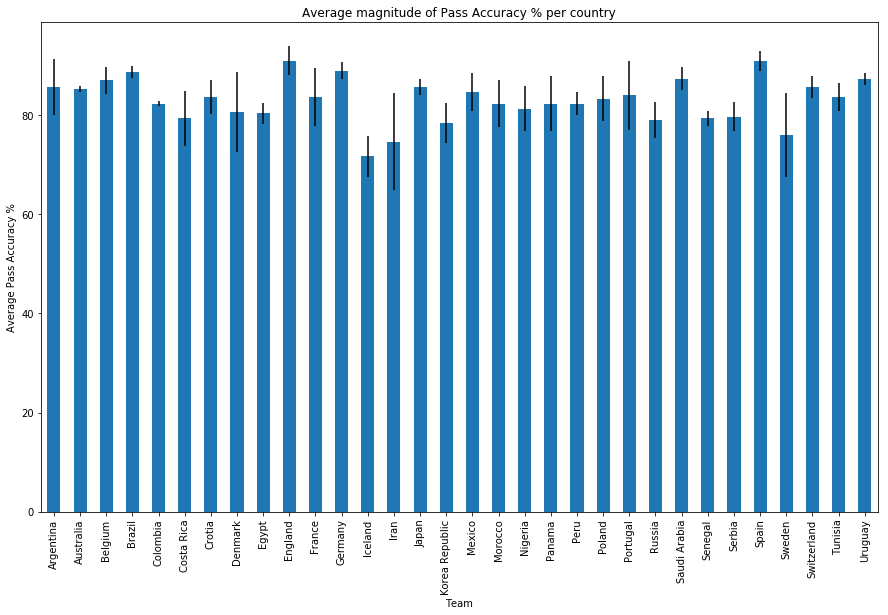

In [16]:
#Pass Accuracy
(df_all.groupby('Team')['Pass Accuracy %']
      .mean()
      .plot(kind='bar', title='Average magnitude of Pass Accuracy % per country', yerr=df_all.groupby('Team')['Pass Accuracy %'].std())
      .set_ylabel('Average Pass Accuracy %'));

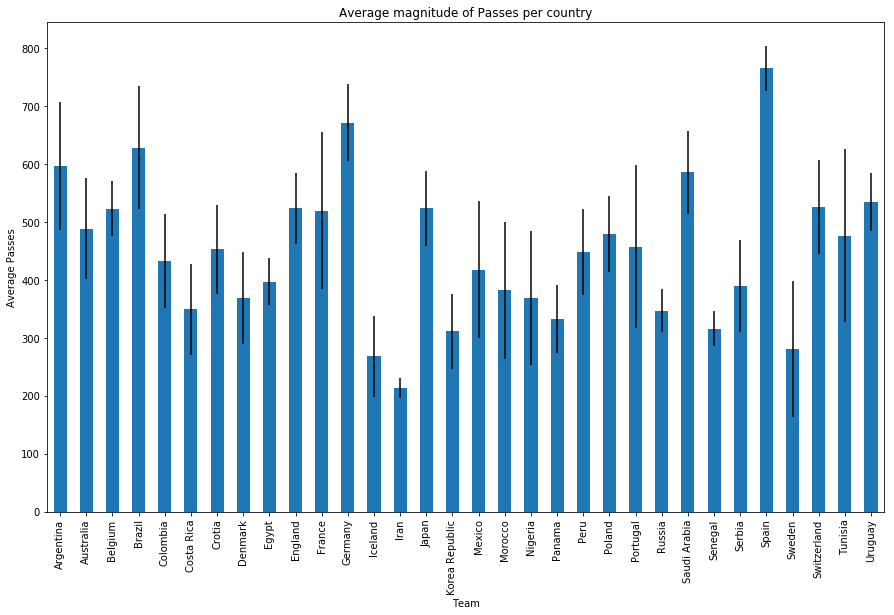

In [17]:
#Passes
(df_all.groupby('Team')['Passes']
      .mean()
      .plot(kind='bar', title='Average magnitude of Passes per country', yerr=df_all.groupby('Team')['Passes'].std())
      .set_ylabel('Average Passes'));

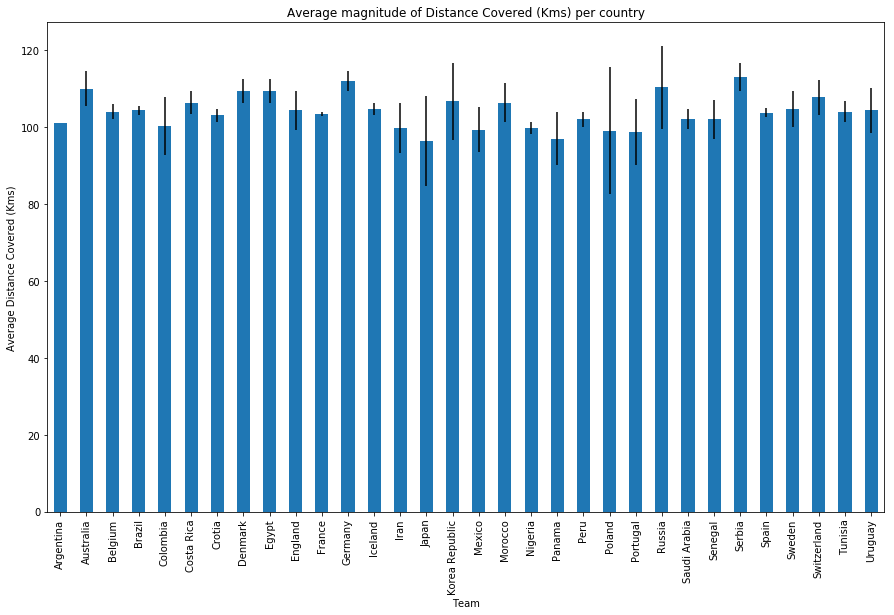

In [18]:
#Distance
(df_all.groupby('Team')['Distance Covered (Kms)']
      .mean()
      .plot(kind='bar', title='Average magnitude of Distance Covered (Kms) per country', yerr=df_all.groupby('Team')['Distance Covered (Kms)'].std())
      .set_ylabel('Average Distance Covered (Kms)'));

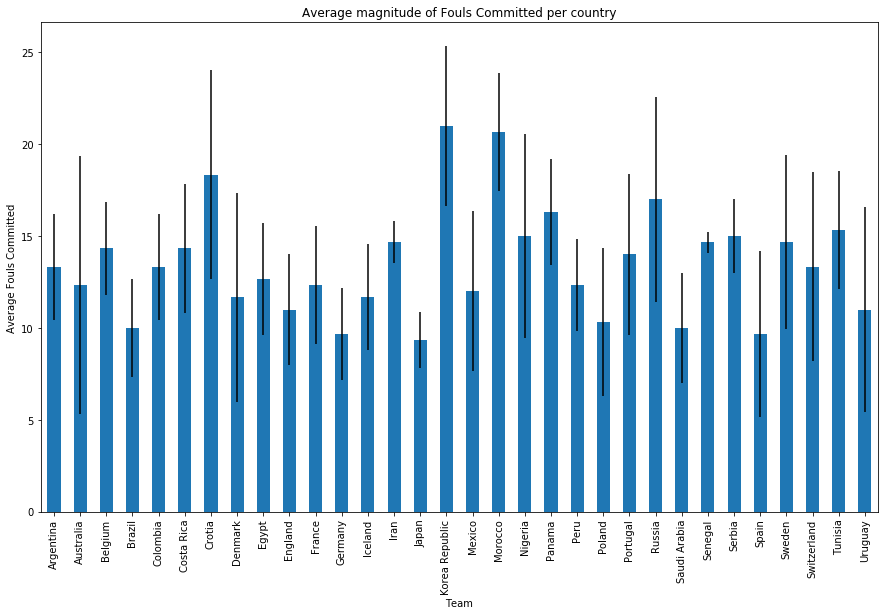

In [19]:
#Fouls
(df_all.groupby('Team')['Fouls Committed']
      .mean()
      .plot(kind='bar', title='Average magnitude of Fouls Committed per country', yerr=df_all.groupby('Team')['Fouls Committed'].std())
      .set_ylabel('Average Fouls Committed'));

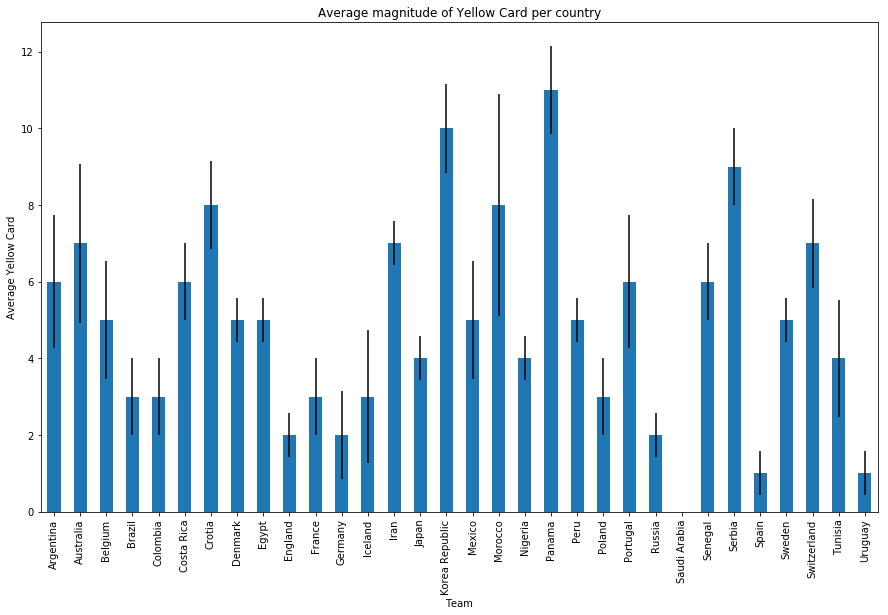

In [20]:
#Yellow
(df_all.groupby('Team')['Yellow Card']
      .sum()
      .plot(kind='bar', title='Average magnitude of Yellow Card per country', yerr=df_all.groupby('Team')['Yellow Card'].std())
      .set_ylabel('Average Yellow Card'));

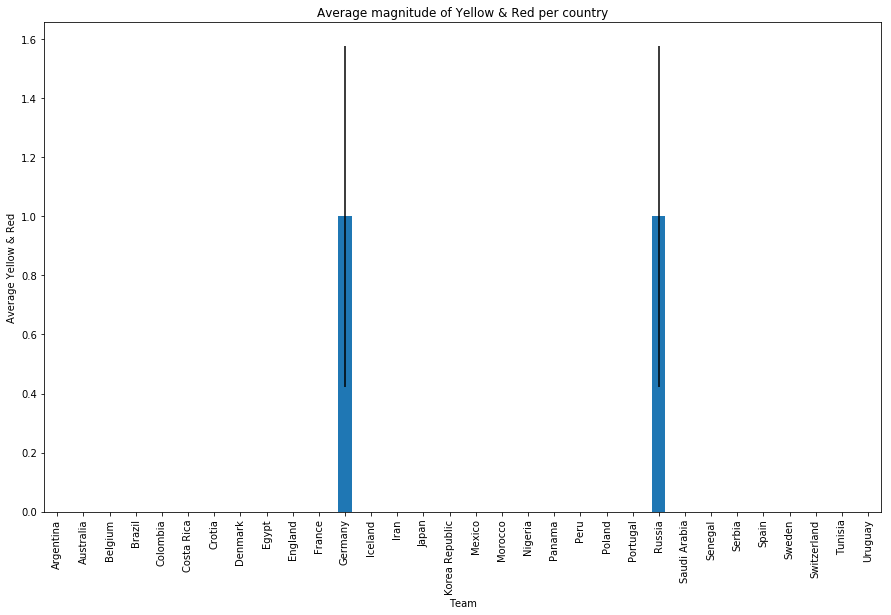

In [21]:
#Y&R
(df_all.groupby('Team')['Yellow & Red']
      .sum()
      .plot(kind='bar', title='Average magnitude of Yellow & Red per country', yerr=df_all.groupby('Team')['Yellow & Red'].std())
      .set_ylabel('Average Yellow & Red'));

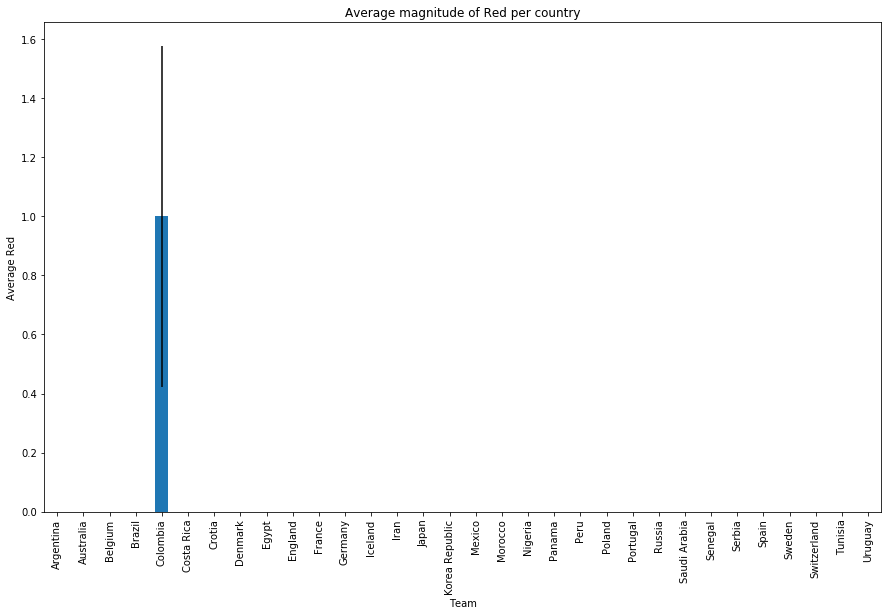

In [22]:
#Red
(df_all.groupby('Team')['Red']
      .sum()
      .plot(kind='bar', title='Average magnitude of Red per country', yerr=df_all.groupby('Team')['Red'].std())
      .set_ylabel('Average Red'));

In [23]:
#Sample game Germany
[game for game in list(zip(df_all['game'], df_all['Goal Difference'])) if "Germany" in game[0]]

[('Germany - Mexico', -1),
 ('Mexico - Germany', 1),
 ('Germany - Sweden', 1),
 ('Sweden - Germany', -1),
 ('Korea Republic - Germany', 2),
 ('Germany - Korea Republic', -2)]

In [24]:
#Sample game Spain
[game for game in list(zip(df_all['game'], df_all['Goal Difference'])) if "Spain" in game[0]]

[('Portugal - Spain', 0),
 ('Spain - Portugal', 0),
 ('Iran - Spain', -1),
 ('Spain - Iran', 1),
 ('Spain - Morocco', 0),
 ('Morocco - Spain', 0)]

Model Correction

In [25]:
df_away_count = df_all.groupby('Opponent')['Goal Difference'].count()
df_home_count = df_all.groupby('Team')['Goal Difference'].count()
df_away_diff = df_all.groupby('Opponent')['Goal Difference'].sum()
df_home_diff = df_all.groupby('Team')['Goal Difference'].sum()
df_away_var = df_all.groupby('Opponent')['Goal Difference'].var()
df_home_var = df_all.groupby('Team')['Goal Difference'].var()
df_home_diff

Team
Argentina        -2
Australia        -3
Belgium           7
Brazil            4
Colombia          3
Costa Rica       -3
Crotia            6
Denmark           1
Egypt            -4
England           5
France            2
Germany          -2
Iceland          -3
Iran              0
Japan             0
Korea Republic    0
Mexico           -1
Morocco          -2
Nigeria          -1
Panama           -9
Peru              0
Poland           -3
Portugal          1
Russia            4
Saudi Arabia     -5
Senegal           0
Serbia           -2
Spain             1
Sweden            3
Switzerland       1
Tunisia          -3
Uruguay           5
Name: Goal Difference, dtype: int64

In [26]:
df_country_mean = (df_home_diff - df_away_diff)/(df_home_count + df_away_count)
df_country_std = np.sqrt(df_home_var.fillna(0) + df_away_var.fillna(0))/(df_home_count + df_away_count)
df_country_mean

Team
Argentina        -0.666667
Australia        -1.000000
Belgium           2.333333
Brazil            1.333333
Colombia          1.000000
Costa Rica       -1.000000
Crotia            2.000000
Denmark           0.333333
Egypt            -1.333333
England           1.666667
France            0.666667
Germany          -0.666667
Iceland          -1.000000
Iran              0.000000
Japan             0.000000
Korea Republic    0.000000
Mexico           -0.333333
Morocco          -0.666667
Nigeria          -0.333333
Panama           -3.000000
Peru              0.000000
Poland           -1.000000
Portugal          0.333333
Russia            1.333333
Saudi Arabia     -1.666667
Senegal           0.000000
Serbia           -0.666667
Spain             0.333333
Sweden            1.000000
Switzerland       0.333333
Tunisia          -1.000000
Uruguay           1.666667
Name: Goal Difference, dtype: float64

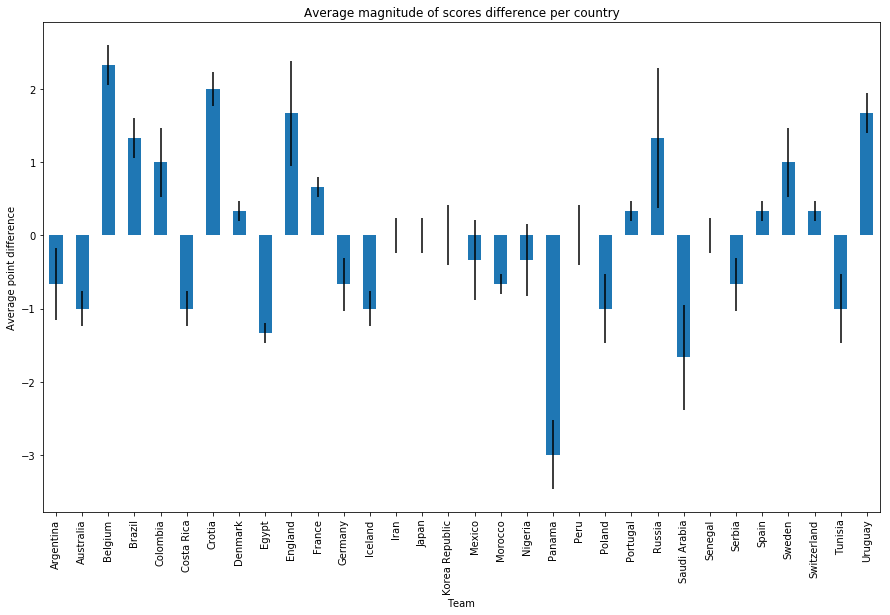

In [27]:
(df_country_mean
      .plot(kind='bar', title='Average magnitude of scores difference per country', yerr=df_country_std)
      .set_ylabel('Average point difference'));

# Selecting Parameters and Building Bayesian Model

In [28]:
#Selecting parameters
df = df_all[['Team', 'Opponent', 'Goal Scored', 'Points', 'Ball Possession %', 'Attempts', 'On-Target', 'Off-Target', 'Corners', 'Goal Conceded', 'Blocked', 'Saves']]
df.head()

,Team,Opponent,Goal Scored,Points,Ball Possession %,Attempts,On-Target,Off-Target,Corners,Goal Conceded,Blocked,Saves
0,Russia,Saudi Arabia,5,3,40,13,7,3,6,0,3,0
1,Saudi Arabia,Russia,0,0,60,6,0,3,2,5,3,2
2,Egypt,Uruguay,0,0,43,8,3,3,0,1,2,3
3,Uruguay,Egypt,1,3,57,14,4,6,5,0,4,3
4,Morocco,Iran,0,0,64,13,3,6,5,1,4,2


In [29]:
teams = df['Team'].unique()
teams = pd.DataFrame(teams, columns=['team'])
teams['i'] = teams.index
teams

,team,i
0,Russia,0
1,Saudi Arabia,1
2,Egypt,2
3,Uruguay,3
4,Morocco,4
5,Iran,5
6,Portugal,6
7,Spain,7
8,France,8
9,Australia,9


In [30]:
df = pd.merge(df, teams, left_on='Team', right_on='team', how='left')
df = df.rename(columns = {'i': 'i_home'}).drop('team', 1)
df = pd.merge(df, teams, left_on='Opponent', right_on='team', how='left')
df = df.rename(columns = {'i': 'i_away'}).drop('team', 1)
df

,Team,Opponent,Goal Scored,Points,Ball Possession %,Attempts,On-Target,Off-Target,Corners,Goal Conceded,Blocked,Saves,i_home,i_away
0,Russia,Saudi Arabia,5,3,40,13,7,3,6,0,3,0,0,1
1,Saudi Arabia,Russia,0,0,60,6,0,3,2,5,3,2,1,0
2,Egypt,Uruguay,0,0,43,8,3,3,0,1,2,3,2,3
3,Uruguay,Egypt,1,3,57,14,4,6,5,0,4,3,3,2
4,Morocco,Iran,0,0,64,13,3,6,5,1,4,2,4,5
5,Iran,Morocco,1,3,36,8,2,5,2,0,1,2,5,4
6,Portugal,Spain,3,1,39,8,3,2,4,3,3,2,6,7
7,Spain,Portugal,3,1,61,12,5,5,5,3,2,0,7,6
8,France,Australia,2,3,51,12,5,4,5,1,3,1,8,9
9,Australia,France,1,0,49,4,1,2,1,2,1,4,9,8


In [31]:
observed_home_goals = df['Goal Scored'].values
observed_away_goals = df['Goal Conceded'].values

home_team = df['i_home'].values
away_team = df['i_away'].values

num_teams = len(teams)
num_games = len(home_team)
num_games

96

In [68]:
#Adding weights to attacking and defensive parameters

#Attacking
g1 = df.groupby('i_away')
att_starting_points = np.log(g1['Goal Scored'].fillna(0).mean())+(1*np.log(g1['Points'].fillna(0).sum()))+(0.5*np.log(g1['Ball Possession %'].fillna(0).mean())) + (0.3*np.log(g1['Attempts'].fillna(0).mean())) + (0.2*np.log(g1['On-Target'].fillna(0).mean())) + (0.2*np.log(g1['Off-Target'].fillna(0).mean())) + (0.1*np.log(g1['Corners'].fillna(0).mean()))

#Defensive
g2 = df.groupby('i_home')
def_starting_points = np.log(g2['Goal Conceded'].fillna(0).mean()) + (0.5*np.log(g2['Blocked'].fillna(0).mean())) + (0.2*np.log(g2['Saves'].fillna(0).mean()))

print(att_starting_points)
print(def_starting_points)

8.59204188734
0.998266450317


In [69]:
#Based on points only
#g1 = df.groupby('i_away')
#att_starting_points = np.log(g1['Points'].fillna(0).sum())
#g2 = df.groupby('i_home')
#def_starting_points = -np.log(g2['Points'].fillna(0).sum())

#print(att_starting_points)
#print(def_starting_points)

In [70]:
with pm.Model() as model:
    # global model priors: standard deviation and intercept
    home = pm.Flat('home') #flat pdf is uninformative - means we have no idea
    sd_att = pm.HalfStudentT('sd_att', nu=3, sd=2.5)
    sd_def = pm.HalfStudentT('sd_def', nu=3, sd=2.5)
    intercept = pm.Flat('intercept')

    # team-specific model parameters
    atts_star = pm.Normal("atts_star", mu=0, sd=sd_att, shape=num_teams)
    defs_star = pm.Normal("defs_star", mu=0, sd=sd_def, shape=num_teams)

    # To allow samples of expressions to be saved, we need to wrap them in pymc3 Deterministic objects
    atts = pm.Deterministic('atts', atts_star - tt.mean(atts_star))
    defs = pm.Deterministic('defs', defs_star - tt.mean(defs_star))
    
    # Assume exponential search on home_theta and away_theta. With pymc3, need to rely on theano.
    # tt is theano.tensor.. why Sampyl may be easier to use..
    home_theta = tt.exp(intercept + home + atts[home_team] + defs[away_team])  
    away_theta = tt.exp(intercept + atts[away_team] + defs[home_team])

    # likelihood of observed data
    home_points = pm.Poisson('home_points', mu=home_theta, observed=observed_home_goals)
    away_points = pm.Poisson('away_points', mu=away_theta, observed=observed_away_goals)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [defs_star, atts_star, intercept, sd_def, sd_att, home]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:53<00:00, 74.26draws/s] 
The number of effective samples is smaller than 25% for some parameters.


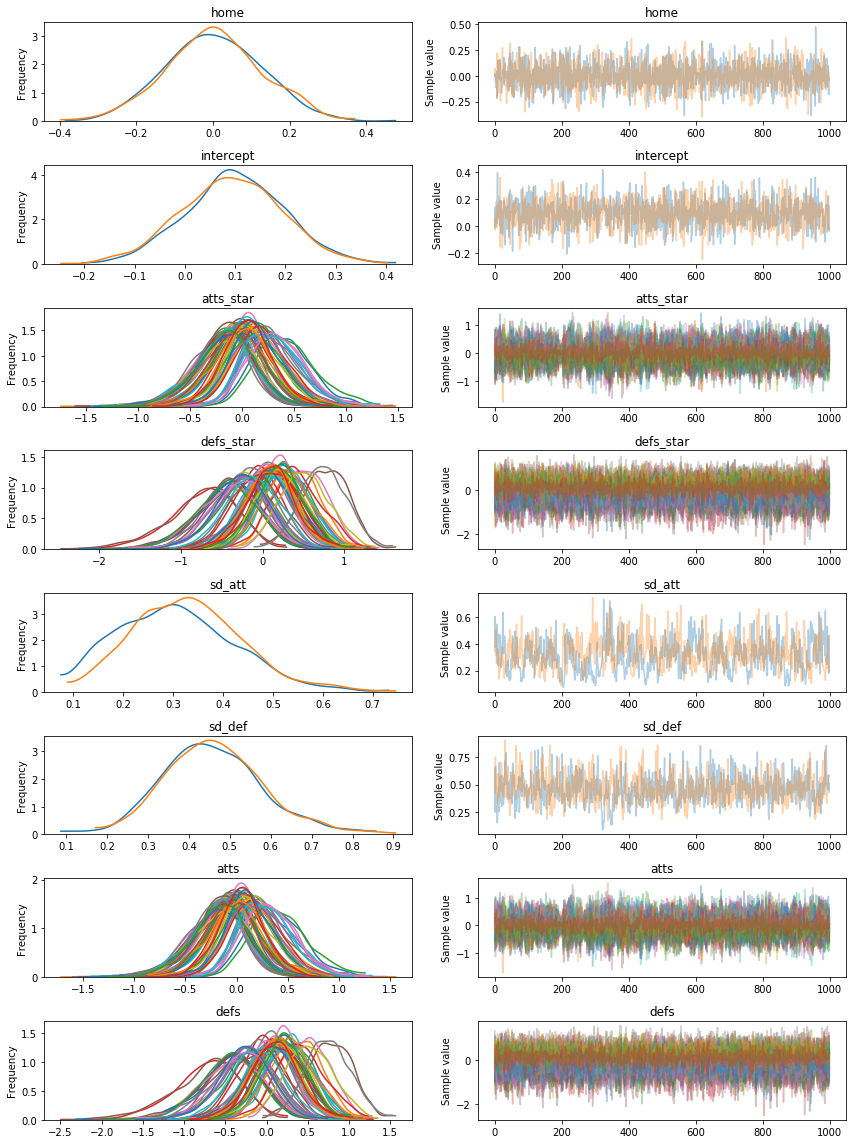

In [71]:
with model:
    trace = pm.sample(1000, tune=1000, cores=2)
    pm.traceplot(trace)

# Plotting

In [72]:
pm.stats.hpd(trace['atts'])

array([[-0.10633843,  0.95250192],
       [-0.71716231,  0.32247133],
       [-0.77919277,  0.29006566],
       [-0.46031771,  0.49843061],
       [-0.75385728,  0.2921999 ],
       [-0.78321094,  0.28744034],
       [-0.33294786,  0.65472242],
       [-0.17505224,  0.83578961],
       [-0.55603925,  0.48475897],
       [-0.65405411,  0.46917212],
       [-0.55454501,  0.41975994],
       [-0.76830216,  0.28029907],
       [-0.67512988,  0.4044035 ],
       [-0.71778759,  0.3958854 ],
       [-0.15847856,  0.85117426],
       [-0.59490167,  0.36306175],
       [-0.71659439,  0.34010806],
       [-0.7613615 ,  0.32614946],
       [-0.71692406,  0.35573178],
       [-0.58616035,  0.47483903],
       [-0.35540154,  0.62208041],
       [-0.29175466,  0.68105283],
       [-0.29718896,  0.64193722],
       [-0.60442409,  0.4125224 ],
       [-0.12553677,  0.8549161 ],
       [-0.73149852,  0.27281889],
       [-0.37657338,  0.57918692],
       [-0.19428978,  0.77370017],
       [-0.31010419,

In [73]:
pm.stats.quantiles(trace['atts'])

{2.5: array([-0.0714009 , -0.73729558, -0.77919277, -0.43277745, -0.75327601,
        -0.86423829, -0.31211199, -0.15298593, -0.57531459, -0.66564572,
        -0.5519909 , -0.76157677, -0.75133213, -0.80946487, -0.17002668,
        -0.54719188, -0.7547719 , -0.7942434 , -0.76747863, -0.57500886,
        -0.36946453, -0.26003804, -0.29619476, -0.58582856, -0.11741352,
        -0.77576729, -0.39449473, -0.17498304, -0.32556121, -0.44714008,
        -0.74869889, -0.42112805]),
 25: array([ 0.21058635, -0.33978631, -0.35397027, -0.11739435, -0.37901551,
        -0.40489726, -0.00470753,  0.10388933, -0.18671464, -0.22862473,
        -0.19393794, -0.3500632 , -0.30314983, -0.31681577,  0.11784322,
        -0.22656181, -0.31818826, -0.34194271, -0.33052929, -0.18946595,
        -0.04966447,  0.01294107, -0.01497271, -0.21794777,  0.12634851,
        -0.35136924, -0.07209878,  0.08541065, -0.03110064, -0.11351939,
        -0.33291613, -0.09875819]),
 50: array([ 0.3803154 , -0.16613762, -0.17

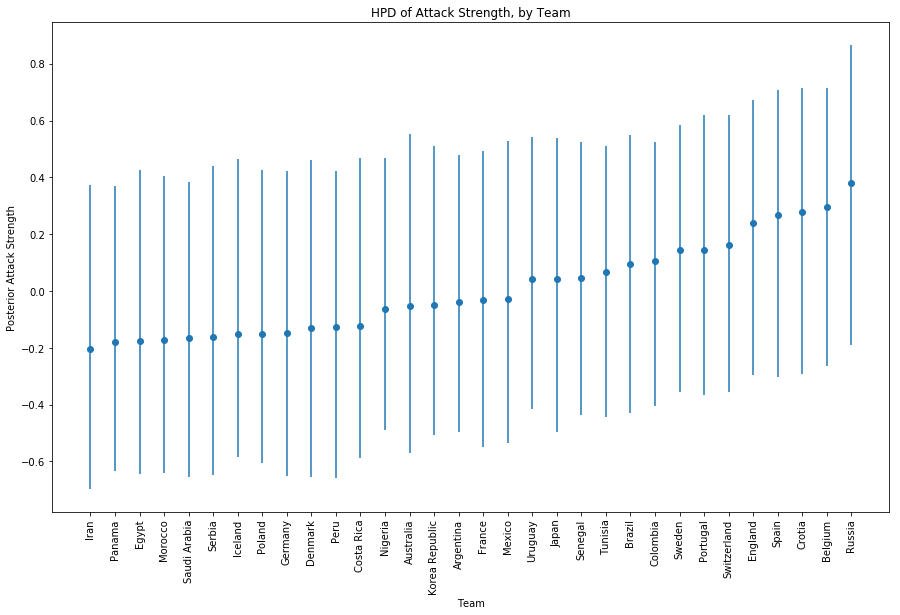

In [74]:
df_hpd = pd.DataFrame(pm.stats.hpd(trace['atts']),
                      columns=['hpd_low', 'hpd_high'],
                      index=teams.team.values)
df_median = pd.DataFrame(pm.stats.quantiles(trace['atts'])[50],
                         columns=['hpd_median'],
                         index=teams.team.values)
df_hpd = df_hpd.join(df_median)
df_hpd['relative_upper'] = df_hpd.hpd_median - df_hpd.hpd_low
df_hpd['relative_lower'] = df_hpd.hpd_high - df_hpd.hpd_median
df_hpd = df_hpd.sort_values(by='hpd_median')
df_hpd = df_hpd.reset_index()
df_hpd['x'] = df_hpd.index + .5


fig, axs = plt.subplots(figsize=(15,9))
axs.errorbar(df_hpd.x, df_hpd.hpd_median,
             yerr=(df_hpd[['relative_lower', 'relative_upper']].values).T,
             fmt='o')
axs.set_title('HPD of Attack Strength, by Team')
axs.set_xlabel('Team')
axs.set_ylabel('Posterior Attack Strength')
_= axs.set_xticks(df_hpd.index + .5)
_= axs.set_xticklabels(df_hpd['index'].values, rotation=90)

Russia is the most attacking team followed by Belgium Spain Crotia and England

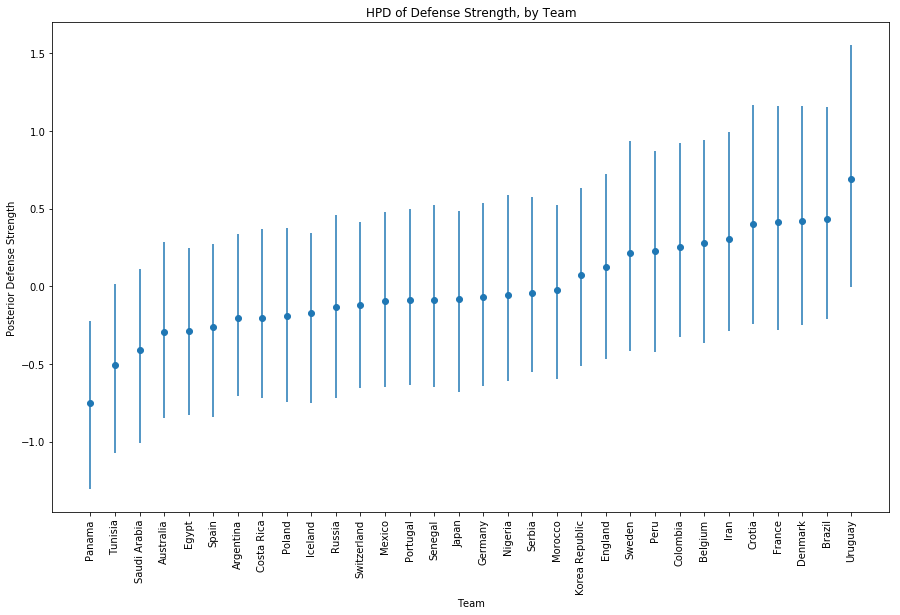

In [75]:
df_hpd = pd.DataFrame(pm.stats.hpd(-trace['defs']),
                      columns=['hpd_low', 'hpd_high'],
                      index=teams.team.values)
df_median = pd.DataFrame(pm.stats.quantiles(-trace['defs'])[50],
                         columns=['hpd_median'],
                         index=teams.team.values)
df_hpd = df_hpd.join(df_median)
df_hpd['relative_lower'] = df_hpd.hpd_median - df_hpd.hpd_low
df_hpd['relative_upper'] = df_hpd.hpd_high - df_hpd.hpd_median
df_hpd = df_hpd.sort_values(by='hpd_median')
df_hpd = df_hpd.reset_index()
df_hpd['x'] = df_hpd.index + .5


fig, axs = plt.subplots(figsize=(15,9))
axs.errorbar(df_hpd.x, df_hpd.hpd_median,
             yerr=(df_hpd[['relative_lower', 'relative_upper']].values).T,
             fmt='o')
axs.set_title('HPD of Defense Strength, by Team')
axs.set_xlabel('Team')
axs.set_ylabel('Posterior Defense Strength')
_= axs.set_xticks(df_hpd.index + .5)
_= axs.set_xticklabels(df_hpd['index'].values, rotation=90)

Uruguay is the most defensive team followed by Brazil Crotia Denmark and France

In [76]:
teams.T

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
team,Russia,Saudi Arabia,Egypt,Uruguay,Morocco,Iran,Portugal,Spain,France,Australia,...,Sweden,Korea Republic,Belgium,Panama,Tunisia,England,Colombia,Japan,Poland,Senegal
i,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31


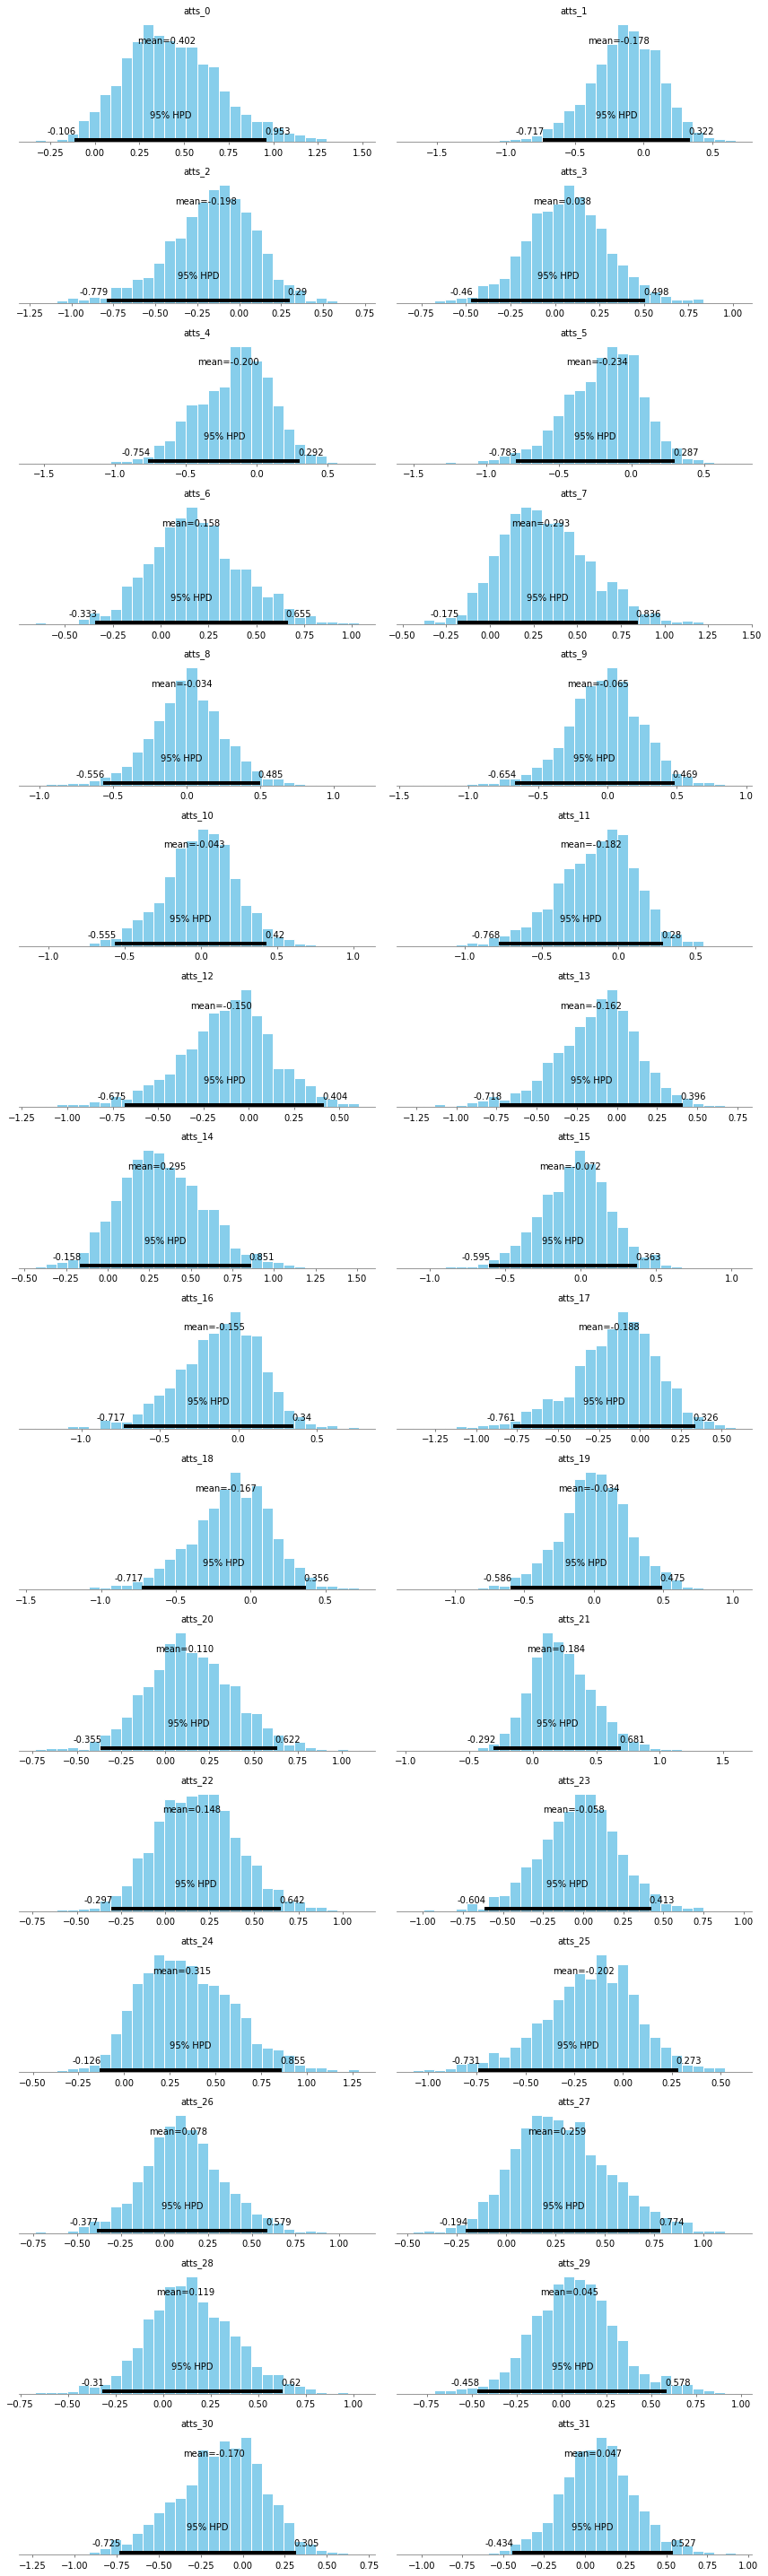

In [77]:
pm.plot_posterior(trace, varnames=['atts']);

# Predictions with Posterior Predictive Checks

In [78]:
with model:
    pp_trace = pm.sample_ppc(trace)

100%|██████████| 1000/1000 [00:02<00:00, 370.88it/s]


In [79]:
home_sim_df = pd.DataFrame({
    'sim_points_{}'.format(i): 3 * home_won
        for i, home_won in enumerate(pp_trace['home_points'] > pp_trace['away_points'])
})
home_sim_df.insert(0, 'team', df['Team'])

away_sim_df = pd.DataFrame({
    'sim_points_{}'.format(i): 3 * away_won
        for i, away_won in enumerate(pp_trace['home_points'] < pp_trace['away_points'])
})
away_sim_df.insert(0, 'team', df['Opponent'])

In [80]:
sim_table = (home_sim_df.groupby('team')
                        .sum()
                        .add(away_sim_df.groupby('team')
                        .sum())
                        .rank(ascending=False, method='min', axis=0)
                        .reset_index()
                        .melt(id_vars='team', value_name='rank')
                        .groupby('team')
                        ['rank']
                        .value_counts()
                        .unstack(level='rank')
                        .fillna(0)
                        .div(1000))

In [81]:
sim_table

rank,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0
team,,,,,,,,,,,,,,,,,,,,,
Argentina,0.006,0.016,0.022,0.023,0.020,0.038,0.046,0.036,0.024,0.017,...,0.060,0.039,0.011,0.011,0.028,0.037,0.034,0.020,0.011,0.001
Australia,0.004,0.011,0.007,0.015,0.020,0.020,0.019,0.023,0.014,0.015,...,0.065,0.036,0.018,0.017,0.036,0.070,0.085,0.045,0.015,0.006
Belgium,0.274,0.149,0.113,0.084,0.072,0.044,0.054,0.050,0.023,0.012,...,0.006,0.000,0.001,0.000,0.001,0.000,0.000,0.000,0.000,0.000
Brazil,0.157,0.107,0.085,0.070,0.059,0.051,0.068,0.039,0.039,0.021,...,0.012,0.012,0.002,0.003,0.005,0.004,0.006,0.005,0.001,0.000
Colombia,0.107,0.093,0.071,0.065,0.065,0.056,0.046,0.050,0.038,0.019,...,0.024,0.012,0.003,0.004,0.008,0.008,0.005,0.006,0.000,0.002
Costa Rica,0.011,0.011,0.010,0.022,0.020,0.026,0.028,0.028,0.020,0.018,...,0.047,0.038,0.017,0.018,0.032,0.055,0.060,0.037,0.016,0.003
Crotia,0.231,0.162,0.097,0.064,0.063,0.063,0.051,0.034,0.029,0.016,...,0.012,0.006,0.003,0.000,0.001,0.002,0.001,0.002,0.000,0.000
Denmark,0.030,0.035,0.048,0.041,0.046,0.049,0.051,0.051,0.029,0.033,...,0.032,0.019,0.007,0.010,0.006,0.016,0.022,0.010,0.006,0.002
Egypt,0.006,0.010,0.009,0.011,0.023,0.019,0.024,0.026,0.012,0.015,...,0.069,0.042,0.021,0.028,0.023,0.050,0.044,0.038,0.022,0.003


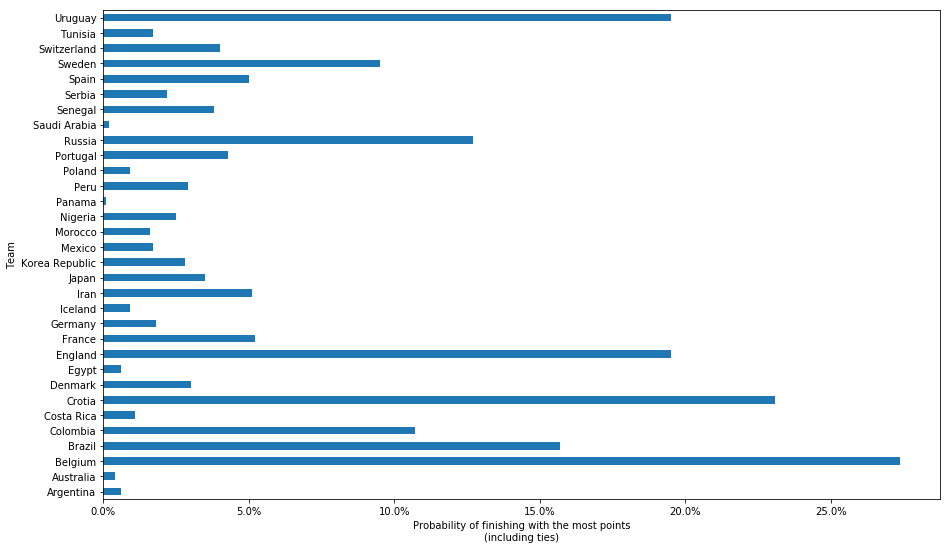

In [82]:
ax = sim_table.loc[:, 1.0].plot(kind='barh')
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.1%}'));
ax.set_xlabel("Probability of finishing with the most points\n(including ties)");
ax.set_ylabel("Team");

In [83]:
percent_win = sim_table.loc[:, 1.0]*100
percent_win.sort_values(ascending=False)

team
Belgium           27.4
Crotia            23.1
Uruguay           19.5
England           19.5
Brazil            15.7
Russia            12.7
Colombia          10.7
Sweden             9.5
France             5.2
Iran               5.1
Spain              5.0
Portugal           4.3
Switzerland        4.0
Senegal            3.8
Japan              3.5
Denmark            3.0
Peru               2.9
Korea Republic     2.8
Nigeria            2.5
Serbia             2.2
Germany            1.8
Tunisia            1.7
Mexico             1.7
Morocco            1.6
Costa Rica         1.1
Iceland            0.9
Poland             0.9
Egypt              0.6
Argentina          0.6
Australia          0.4
Saudi Arabia       0.2
Panama             0.1
Name: 1.0, dtype: float64

# Covariate Exploration

In [84]:
df_trace = pm.trace_to_dataframe(trace)

In [85]:
teams.T

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
team,Russia,Saudi Arabia,Egypt,Uruguay,Morocco,Iran,Portugal,Spain,France,Australia,...,Sweden,Korea Republic,Belgium,Panama,Tunisia,England,Colombia,Japan,Poland,Senegal
i,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31


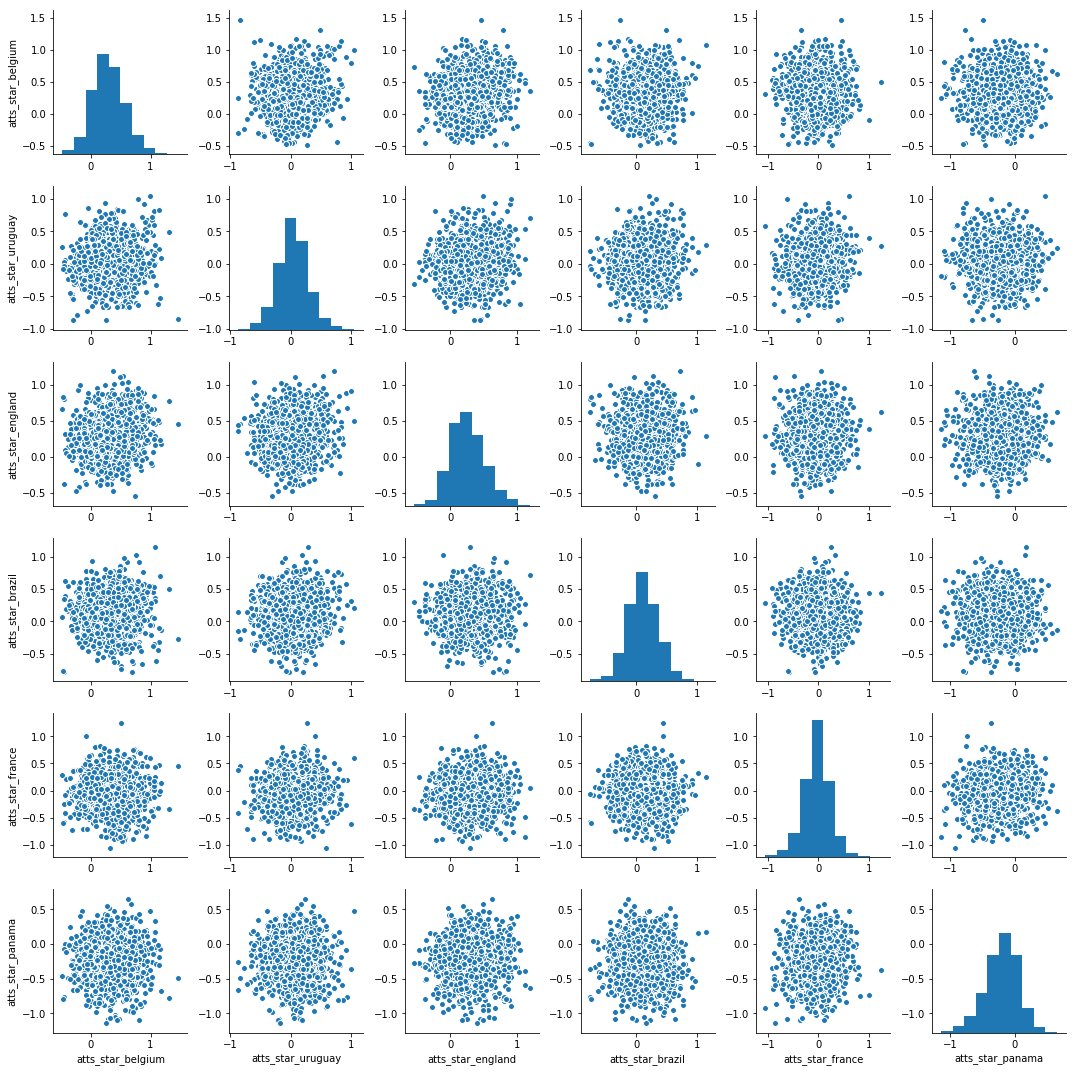

In [86]:
import seaborn as sns

cols = {
    'atts_star__14': 'atts_star_belgium',
    'atts_star__3': 'atts_star_uruguay',
    'atts_star__27': 'atts_star_england',
    'atts_star__20': 'atts_star_brazil',
    'atts_star__8': 'atts_star_france',
    'atts_star__25': 'atts_star_panama'
}

df_trace_att = df_trace[list(cols)].rename(columns=cols)
_ = sns.pairplot(df_trace_att)

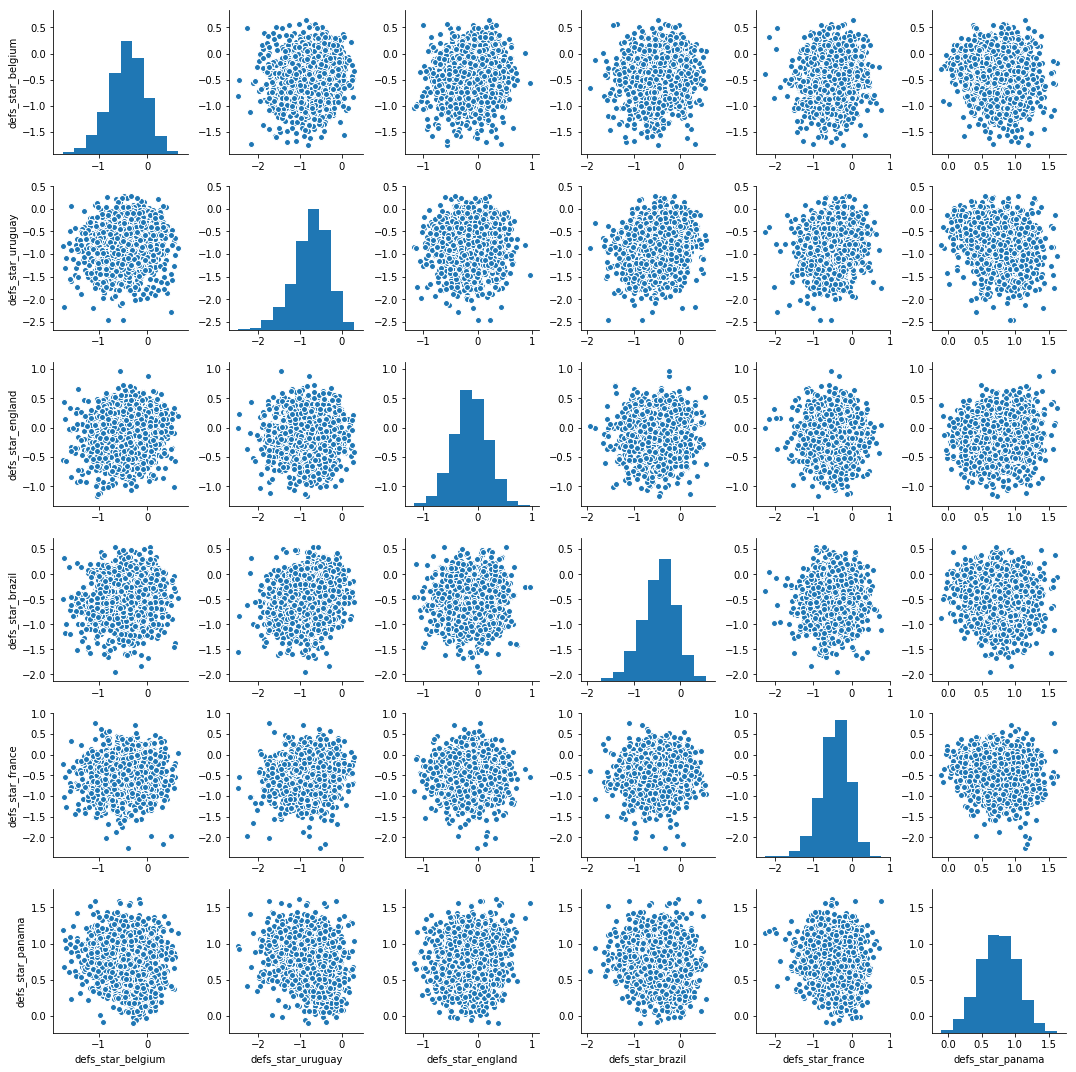

In [87]:
import seaborn as sns

cols = {
    'defs_star__14': 'defs_star_belgium',
    'defs_star__3': 'defs_star_uruguay',
    'defs_star__27': 'defs_star_england',
    'defs_star__20': 'defs_star_brazil',
    'defs_star__8': 'defs_star_france',
    'defs_star__25': 'defs_star_panama'
}

df_trace_def = df_trace[list(cols)].rename(columns=cols)
_ = sns.pairplot(df_trace_def)

# Conclusion

As observed from the above plots and table showing probabilty to score most points, it is apparent which teams qualify for the Round of 16. Below is the points table as per the prediction based on attacking and defensive parameters

<b>A</b>
Uruguay           21.9
Russia            10.1
Saudi Arabia       0.6
Egypt              1.0

<b>B</b>
Spain              5.4
Portugal           5.1
Iran               3.7
Morocco            1.9

<b>C</b>
France             4.7
Denmark            3.8
Peru               2.1
Australia          0.6

<b>D</b>
Crotia            26.5
Argentina          2.6
Nigeria            2.6
Iceland            1.0

<b>E</b>
Brazil            15.9
Switzerland        5.2
Serbia             1.7
Costa Rica         0.7

<b>F</b>
Sweden            10.7
Mexico             1.4
Korea Republic     2.7
Germany            1.2

<b>G</b>
Belgium           30.8
England           22.3
Tunisia            0.3
Panama             0.0

<b>H</b>
Colombia          11.2
Japan              3.8
Senegal            2.9
Poland             0.8





<b>Key highlights from group stage</b>

a. Japan and Senegal had tied for round of 16 qualification and Japan qualified on basis of least yellow cards. Its seen above that Japan slightly leads Senegal.

b. Argentina and Nigeria are tied at 2.6 probability of qualification but Argentina qualified as they scored more Points. Weights for Points need to be adjusted to obtain distinguishable results here.

c. Spain and Portugal have exact same points with Spain leading in Goal Difference and so its apparent in the above stats.

<b>Round of 16</b>

France   4.7 vs Argentina   2.6 - <i>France won</i>

Uruguay 21.9 vs Portugal    5.1 - <i>Uruguay won</i>

Spain    5.4 vs Russia     10.1 - <i>Russia won</i>

Crotia  26.5 vs Denmark     3.8 - <i>Croatia won</i>

Brazil  15.9 vs Mexico      1.4 - <i>Brazil won</i>

Belgium 30.8 vs Japan       3.8 - <i>Belgium won</i>

Sweden  10.7 vs Switzerland 5.2 - <i>Sweden to win??</i>

England 22.3 vs Colombia   11.2 - <i>England to win??</i>

<b>Next?</b>

Update dataset with Round of 16 results and statistics and re-run predictions for quarters, semis and final
